In [1]:
# Step 1: Importing the libraries Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_excel(r"D:\Segmentation_D12.xlsx")
df.head()
# Meta data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


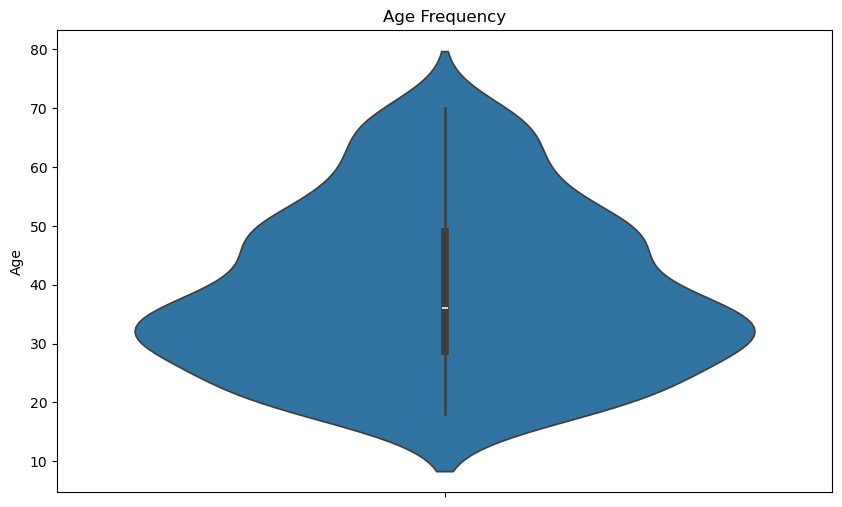

In [2]:
# Step 2: Plotting the Age frequency of customers
df.drop(['CustomerID'],axis=1,inplace=True)
plt.figure(figsize=(10,6))
plt.title('Age Frequency')
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()

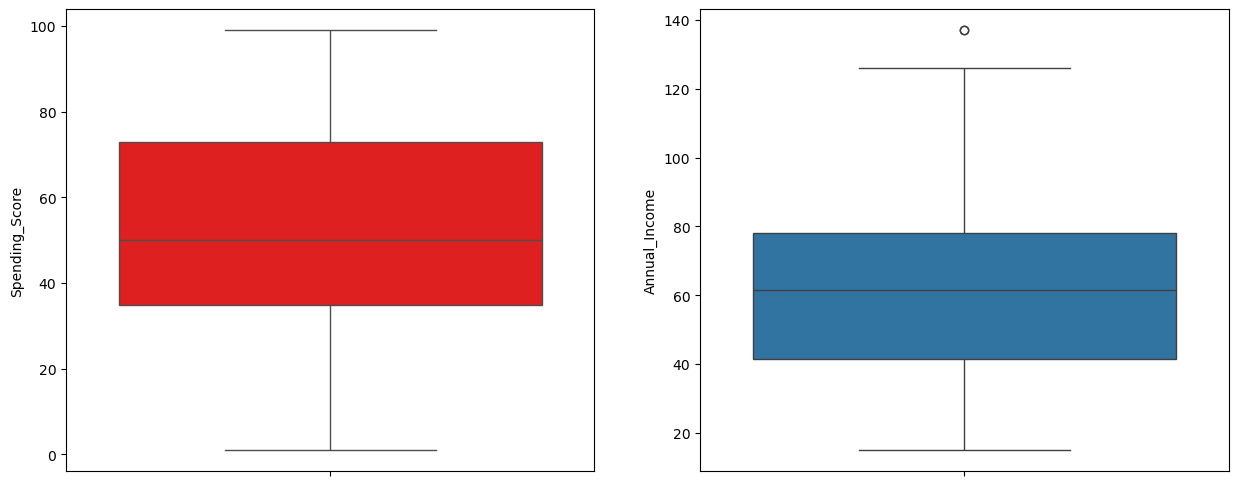

In [3]:

# Step 3: Box plot of Spending score and annual Income
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending_Score"],color="Red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual_Income"])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

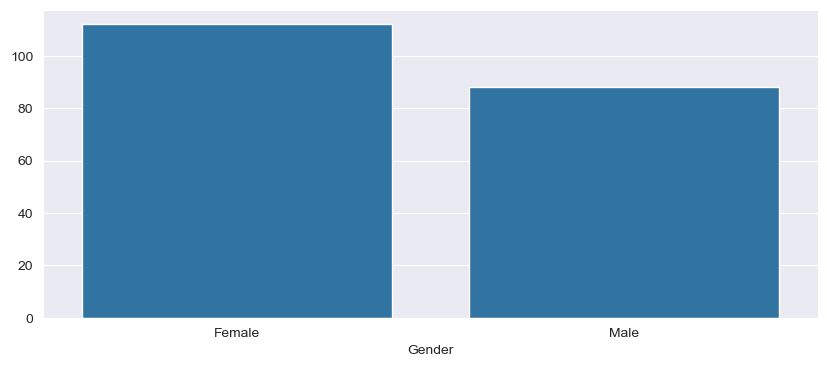

In [4]:
 # Step 4 - A bar Plot to check the distribution of male and female popultion in the dataset
gender=df.Gender.value_counts()
sns.set_style('darkgrid')
plt.figure(figsize=(10,4))
sns.barplot(x=gender.index,y=gender.values)
plt.show

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13960\2743680032.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x,y=y,palette="rocket")


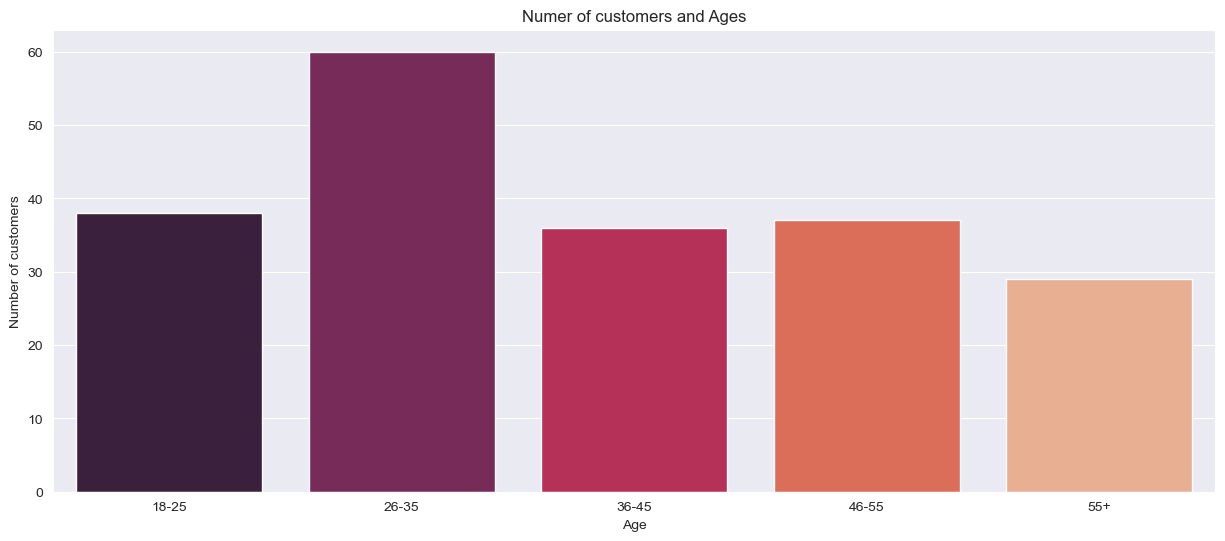

In [5]:
# Step 5: Bar plot to check the distribution of the number of customers in each age group
age18_25=df.Age[(df.Age<=25)&(df.Age>=18)]
age26_35=df.Age[(df.Age<=35)&(df.Age>=26)]
age36_45=df.Age[(df.Age<=45)&(df.Age>=36)]
age46_55=df.Age[(df.Age<=55)&(df.Age>=46)]
age55above=df.Age[df.Age>=56]
x=["18-25", "26-35", "36-45", "46-55", "55+"]
y=[len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=x,y=y,palette="rocket")
plt.title("Numer of customers and Ages")
plt.xlabel("Age")
plt.ylabel("Number of customers")
plt.show()

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

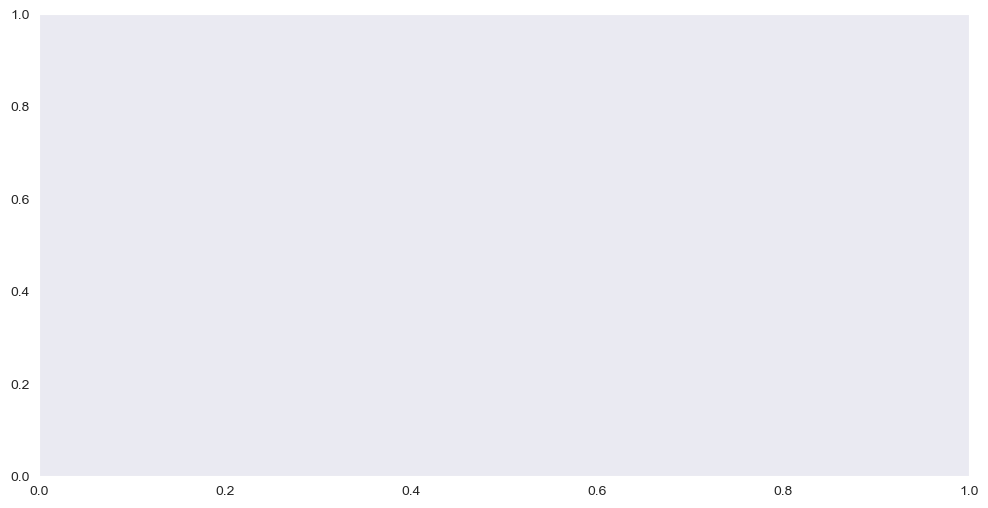

In [8]:
# Step 6 - Plotted within Cluster Sum of Squares(WCSS) 
from sklearn.cluster import KMeans
wcss=[]
for k in range (1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
    plt.figure(figsize=(12,6))
    plt.grid()
    plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
    plt.xlabel("K Value")
    plt.xticks(np.arange(1,11,1))
    plt.ylabel("WCSS")
    plt.show()

In [ ]:
 # Step 7 - 3D plot to visualize the spending score of the customers with their annual income
km=KMeans(n_clusters=5)
clusters=km.fit_predict(df.iloc[:,1:])
df["label"]=clusters
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.Age[df.label==0],df["Annual_Income"][df.label==0],df["Spending_Score"][df.label==0],c="blue",s=60)
ax.scatter(df.Age[df.label==1],df["Annual_Income"][df.label==1],df["Spending_Score"][df.label==1],c="green",s=60)
ax.scatter(df.Age[df.label==2],df["Annual_Income"][df.label==2],df["Spending_Score"][df.label==2],c="red",s=60)
ax.scatter(df.Age[df.label==3],df["Annual_Income"][df.label==3],df["Spending_Score"][df.label==3],c="pink",s=60)
ax.scatter(df.Age[df.label==4],df["Annual_Income"][df.label==4],df["Spending_Score"][df.label==4],c="purple",s=60)
ax.view_init(30,185)
plt.xlabel("Age")
plt.ylabel("Annual_Income")
ax.set_zlabel("Spending_Score")
plt.show()